In [ ]:
!pip install -q sunpy[map,net,timeseries]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.8/195.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 84.2 MB/s eta 0:00:00


In [6]:
from datetime import datetime

from astropy.time import Time,TimeDelta
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.timeseries import TimeSeries

# Setup support for plotting data with units
from astropy.visualization import quantity_support, time_support
quantity_support()
time_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x123a46860>

# Search for some OMNI data
To search for different datasets you can use the form at https://cdaweb.gsfc.nasa.gov/index.html/

**Change the starttime, endtime and trange to plot data from desired date.**

In [7]:
# Set up search parameters
starttime = datetime(2012, 1, 23, 0, 0, 0)
endtime = datetime(2012, 1, 24, 20, 30, 0)
trange = a.Time('2012/01/23 00:00:00', '2012/01/24 20:30:00')

dataset = a.cdaweb.Dataset('OMNI_COHO1HR_MERGED_MAG_PLASMA')
# dataset = a.cdaweb.Dataset('OMNI_HRO2_5MIN')

# Carry out the search
result = Fido.search(trange & dataset)
print(result)

Results from 1 Provider:

1 Results from the CDAWEBClient:
Source: https://cdaweb.gsfc.nasa.gov/index.html

           Dataset                    Start time               End time       
------------------------------ ----------------------- -----------------------
OMNI_COHO1HR_MERGED_MAG_PLASMA 2012-01-01 00:00:00.000 2012-01-31 23:00:00.000




# Download data

In [8]:
downloaded_file_paths = Fido.fetch(result)
print(downloaded_file_paths)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

['/Users/nawinngampoopun/sunpy/data/omni_coho1hr_merged_mag_plasma_20120101_v01.cdf']


In [11]:
# The OMNI dataset contains some non-standard unit strings which we need
# to manually tell astropy about
u.add_enabled_units([u.def_unit('Deg K', u.K),
                     u.def_unit('Deg', u.deg),
                     u.def_unit('Re', u.R_earth)])
omni = TimeSeries(downloaded_file_paths, concatenate=True)
print(omni.columns)

InvalidVersion: Something went wrong: Invalid version: 'unknown'

# Plot Data
**Change xlim and individual ylims to change axis limites**

(-10.0, 15.0)

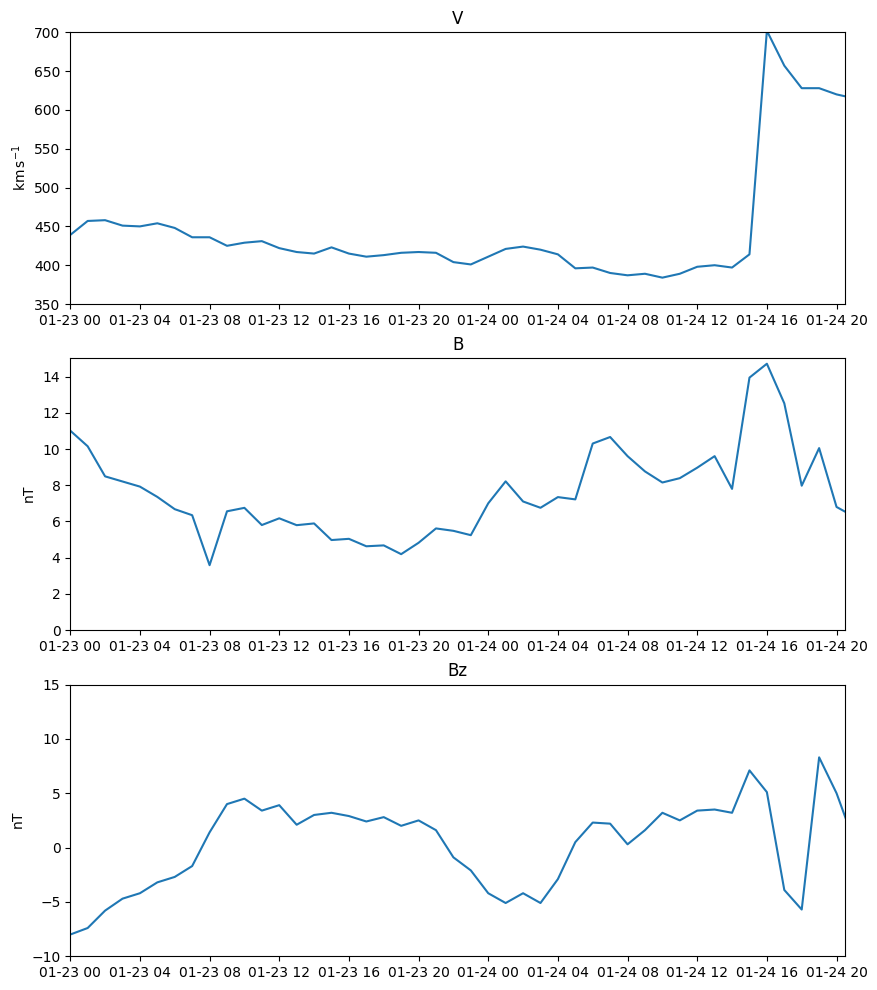

In [ ]:
time_support(format='plot_date', scale='utc')
xlim = Time(['2012-01-23T00:00:00', '2012-01-24T20:30:00'])
timearray = omni.time
fig, axs = plt.subplots(nrows=3, figsize=(10,12), sharex=True)
fig.suptitle('OMNI data from ' + timearray[0].to_value('iso',subfmt='date_hm') + ' to ' + timearray[-1].to_value('iso', subfmt='date_hm')) 

axs[0].plot(timearray, omni.quantity('V'))
axs[0].set_title(r'V')
axs[0].set_ylabel(r'km s$^{-1}$')
axs[0].set_ylim([350,700])

axs[1].plot(timearray, np.sqrt(omni.quantity('BT')**2 +omni.quantity('BR')**2 + omni.quantity('BN')**2))
axs[1].set_title(r'|B|')
axs[1].set_ylim([0,15])

axs[2].plot(timearray, omni.quantity('BN'))
axs[2].set_title(r'B$_z$')
axs[2].set_ylim([-10,15])
axs[2].set_xlabel('Time (UT)')
#set date format to be date_hms
date_form = DateFormatter("%Y-%m-%d %H:%M")
axs[2].xaxis.set_major_formatter(date_form)

for ax in axs:
    ax.grid()
    ax.set_xlim(xlim)

fig.autofmt_xdate() #automatically format times on x axis
fig.patch.set_alpha(1.0)